# Tuning ANN

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./data/performance/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [5, 10],
              'epochs': [1, 2],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2) #cross-validation

grid_search = grid_search.fit(X_train, y_train)

Epoch 1/1
4000/4000 [==============================] - 1s 329us/step - loss: 0.5099 - acc: 0.7943
Epoch 1/1
4000/4000 [==============================] - 1s 336us/step - loss: 0.5156 - acc: 0.7953
Epoch 1/1
4000/4000 [==============================] - 1s 325us/step - loss: 0.5304 - acc: 0.7965
Epoch 1/1
4000/4000 [==============================] - 1s 323us/step - loss: 0.5253 - acc: 0.7948
Epoch 1/2
4000/4000 [==============================] - 1s 366us/step - loss: 0.5109 - acc: 0.7938
Epoch 2/2
4000/4000 [==============================] - 1s 211us/step - loss: 0.4211 - acc: 0.8140
Epoch 1/2
4000/4000 [==============================] - 1s 364us/step - loss: 0.5041 - acc: 0.7935
Epoch 2/2
4000/4000 [==============================] - 1s 199us/step - loss: 0.4244 - acc: 0.7950
Epoch 1/2
4000/4000 [==============================] - 1s 363us/step - loss: 0.5317 - acc: 0.7963
Epoch 2/2
4000/4000 [==============================] - 1s 218us/step - loss: 0.4351 - acc: 0.7970
Epoch 1/2
4000/4000 

In [42]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'batch_size': 5, 'epochs': 2, 'optimizer': 'adam'}
0.811


# Better model or more data?

## Learning curves

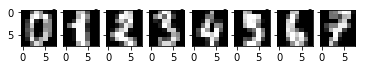

In [43]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Smaller dataset than MNIST
digits = load_digits()
X, y = digits.data, digits.target

for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential()
model.add(Dense(16, input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [45]:
from sklearn.model_selection import train_test_split

# store the initial random weights
initial_weights = model.get_weights()
y_cat = to_categorical(y, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    test_size=0.3)

In [46]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 125,  502,  879, 1255])

In [47]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration reset the weights of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=300,
                  callbacks=[EarlyStopping(monitor='loss', patience=1)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    e = model.evaluate(X_test, y_test, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Done size:  125
Done size:  502
Done size:  879
Done size:  1255


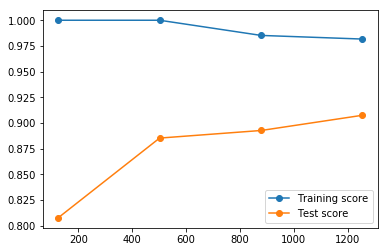

In [48]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

# Batch normalization

#### Good for CNN - images

Technique:
- Reduce the chance of overfitting by rescaling features between layers
- Improve performance of big networks - they convert faster and have better accuracy
- Enables higher learning rates
- Normalization on input layer is good, why not use it between hidden layers ?


10 epochs, 512 units, 3 repeats

In [49]:
from keras.layers import BatchNormalization
import time


def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512,
                      activation='sigmoid',
                      optimizer='sgd',
                      do_bn=False,
                      epochs=10,
                      repeats=3):
    histories = []
    
    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        
        # first fully connected layer
        model.add(Dense(units,
                        input_shape=X_train.shape[1:],
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # second fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # third fully connected layer
        model.add(Dense(units,
                        kernel_initializer='normal',
                        activation=activation))
        if do_bn:
            model.add(BatchNormalization())

        # output layer
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])
        
        start = time.time()
        
        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['acc'], h.history['val_acc']])
        
        end = time.time()
        print(repeat, 'time: ' + str(end - start))

    histories = np.array(histories)
    
    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

### NO BatchNormalization

In [50]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=False)

0 time: 2.3772780895233154
1 time: 2.331395149230957
2 time: 2.313337802886963



### With BatchNormalization

In [51]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(X_train, y_train, X_test, y_test, do_bn=True)

0 time: 4.668139457702637
1 time: 4.43618631362915
2 time: 5.564295053482056



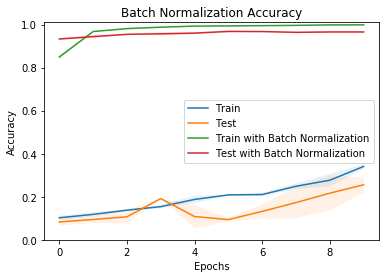

In [52]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)
    
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
plt.ylim(0, 1.01)
plt.title("Batch Normalization Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')

# Embeding layer

#### Good for text

When we work with text we should use back of words and convert text to vector. Created vector will be usually very large and its not good for neural network.
Embeding layer takes huge vector from vocabulary and reduce it with fully connected vector.


Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:
- It can be used alone to learn a word embedding that can be saved and used in another model later.
- It can be used as part of a deep learning model where the embedding is learned along with the model itself.
- It can be used to load a pre-trained word embedding model, a type of transfer learning.
- The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

- **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
- **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
- **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

more info: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [53]:
from keras.datasets import imdb

In [54]:
folder = r'./'

#Words are already converted to numbers
(X_train, y_train), (X_test, y_test) = imdb.load_data(folder + 'imdb.npz',
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

17465344/17464789 [==============================] - 3s 0us/step


In [32]:
idx = imdb.get_word_index()
max(idx.values())

88584

In [33]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Activation, Dense

#Number of words in review
maxlen = 100

X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

In [34]:
max_features = max([max(x) for x in X_train_pad] + 
                   [max(x) for x in X_test_pad]) + 1
max_features

88587

In [35]:
X_train_pad.shape

(25000, 100)

In [36]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         11339136  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 11,388,609
Trainable params: 11,388,609
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train_pad, y_train,
          batch_size=32,
          epochs=2,
          validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/2
17500/17500 [==============================] - 149s 9ms/step - loss: 0.4756 - acc: 0.7717 - val_loss: 0.4492 - val_acc: 0.7929
Epoch 2/2
17500/17500 [==============================] - 138s 8ms/step - loss: 0.2683 - acc: 0.8943 - val_loss: 0.3913 - val_acc: 0.8333


In [38]:
score, acc = model.evaluate(X_test_pad, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 14s 557us/step
Test score: 0.39778440057754516
Test accuracy: 0.82976
